In [ ]:
# A notebook implementation of a script created to test 'ERT with priors' on data from Op 't Hof

# Demonstrating/applying prior ground truth information to ERT
## Example with data from Op 't Hof, Zeeland

This is a notebook version of a script previously set up and tested for the inversion of ERT roll-along data from Op 't Hof, Zeeland, recorded in spring 2024, to integrate some layer information and water EC data. The *a priori* data for this location is good, but more detail would be useful if the context were more complex. In this case, however, the subsurface is fairly simple.

With this notebook, a possible processing sequence is introduced, starting with 'unconstrained' inversion, where no prior information is introduced. With the information from the unconstrained inversion, we can then integrate other information we (may) have about the subsurface, such as layer boundaries and/or resistivity information. The most complex constraint method in pyGIMLi (as of September 2024) is apply geostatistical regularisation to integrate a vertical resistivity-depth profile (e.g. from borehole measurements).

There is more background on regularisation (quite theoretical) on the pyGIMLi website at [Regularization - concepts explained](https://www.pygimli.org/_tutorials_auto/3_inversion/plot_5_Regularization.html) and [Geostatistical regularization](https://www.pygimli.org/_tutorials_auto/3_inversion/plot_6-geostatConstraints.html) along with an example using more complex *a priori* data at [Incorporating prior data into ERT inversion](https://www.pygimli.org/_examples_auto/6_inversion/plot_5_ert_with_priors.html).




The first steps are to load pyGIMLi into the Colab space, then import the necessary packages/modules, and link to the source data folder.

In [ ]:
# Install pyGIMLi and dependencies to Colab - DO NOT RUN LOCALLY
!pip install pygimli

In [5]:
import pygimli as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygimli.physics import ert
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from pygimli.viewer.mpl import draw1DColumn

datafolder = "..\\exampledata\\NL\\"

The sample data used for this example has been converted to the [Unified Data Format](http://resistivity.net/bert/data_format.html) used by the pyBERT and pyGIMLi working group. In the scripts section of the repository is a routine (txt-to-ohm_Terrameter.py) that reformats Terrameter-style txt files to the UDF format. The script \[as of 30/9/2024] makes some assumptions about input format; notes on that are in the script.

Next section loads the ERT data and 'prior' data with ground resistivity values at a test point. The last line outputs the values loaded from the data file.

In [8]:
data = ert.load(datafolder+"2024-03-07 OPTHOF-ROLL_GradientXL_2.ohm") # Load data to container from BERT format
terrain = pg.z(data) # store the terrain information which gets moved to 'y' axis during inversion; all zeroes for this example

prior = pd.read_csv(datafolder+"layers.txt", sep = "\\s+")#, header = 0) # load the table of estimated/measured layers & properties

print(data, data.tokenList()) # print summary of data container - good to check # of sensors, measurements and channels


Data: Sensors: 121 data: 2961, nonzero entries: ['a', 'b', 'err', 'm', 'n', 'r', 'rhoa', 'valid'] SensorIdx: a b m n  Data: err i ip iperr k r rhoa u valid 


Next up, calculate the geometric factors, and from those and the values of 'r' in the observed data, calculate resistivity, $\rho$(a) which we can compare with the instrument-calculated apparent resistivity. This is probably not essential for flat surveys. Where there is a significant variation in elevation along the line, the geometric factors can be calculated with a numeric method (```numerical=True```) which factors in the topography.

30/09/24 - 16:03:53 - pyGIMLi - INFO - Save RVector binary
30/09/24 - 16:03:53 - pyGIMLi - INFO - Cache stored: C:\Users\matthew.noteboom\AppData\Roaming\pygimli\Cache\7289532043780295515


Text(0.5, 0.98, 'Apparent Resistivity calculated by pyGIMLi')

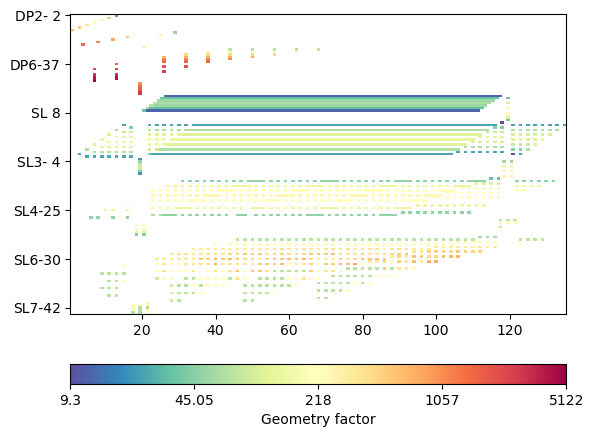

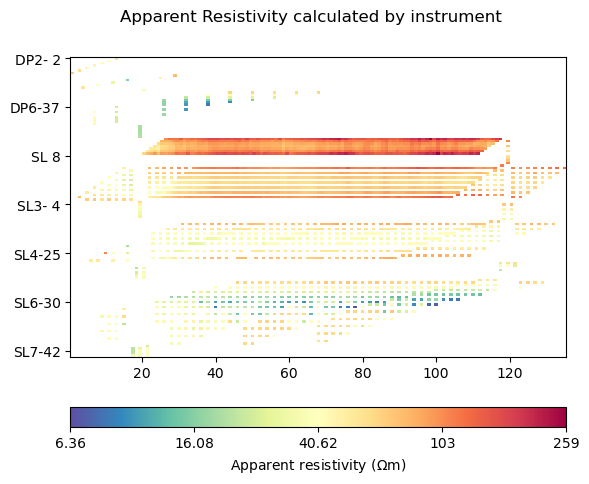

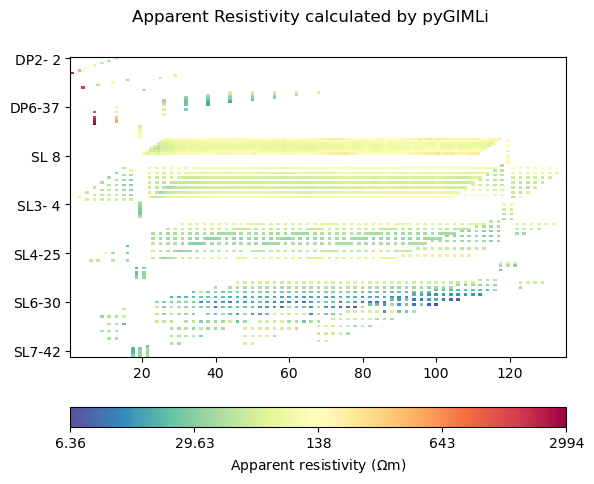

In [9]:
data['k'] = ert.createGeometricFactors(data, numerical=False)
ert.show(data, data['k'], logScale=True, label='Geometry factor')
data['rhoa_calc'] = data['r'] * data['k']

ert.show(data, data['rhoa'])
fig = plt.gcf()
fig.suptitle("Apparent Resistivity calculated by instrument")

ert.show(data, data['rhoa_calc'])
fig = plt.gcf()
fig.suptitle("Apparent Resistivity calculated by pyGIMLi")
